# Adsorbate Group Fingerprints Setup

In this tutorial we will try the adsorbate fingerprint generator, which is useful for converting adsorbates on extended surfaces into fingerprints for predicting their chemisorption energies.

Attached to the atoms objects, the fingerprinter needs information about the atoms belonging to the adsorbate.
Either one can identify the atomic indices in `atoms.info['ads_index']`, or one can specify the chemical formula in `atoms.info['key_value_pairs']['species']`.

  ```python
    atoms.info['ads_atoms'] = dictionary[f]['ads_index']
    atoms.info['key_value_pairs']['species'] = 'CH3'
    structures.append(atoms)
  ```

In [2]:
import numpy as np
import ase.io
from atoml.fingerprint.setup import FeatureGenerator
from atoml.fingerprint.adsorbate_prep import autogen_info
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    plot = True
except ImportError:
    print('Pandas and seaborn modules are needed for this tutorial.')

  0%|          | 0/3 [00:00<?, ?it/s]/Users/mhangaard/src/AtoML/atoml/fingerprint/adsorbate_fingerprint.py:274: RuntimeWarning: Mean of empty slice
  result = list(np.nanmean(dat, axis=0))
100%|██████████| 3/3 [00:00<00:00, 429.69it/s]


0 atomic_number_surf1av
1 atomic_volume_surf1av
2 boiling_point_surf1av
3 density_surf1av
4 dipole_polarizability_surf1av
5 electron_affinity_surf1av
6 group_id_surf1av
7 lattice_constant_surf1av
8 melting_point_surf1av
9 period_surf1av
10 vdw_radius_surf1av
11 covalent_radius_cordero_surf1av
12 en_allen_surf1av
13 atomic_weight_surf1av
14 atomic_radius_surf1av
15 heat_of_formation_surf1av
16 dft_bulk_modulus_surf1av
17 dft_rhodensity_surf1av
18 dbcenter_surf1av
19 dbfilling_surf1av
20 dbwidth_surf1av
21 dbskew_surf1av
22 dbkurtosis_surf1av
23 oxi_min_surf1av
24 oxi_med_surf1av
25 oxi_max_surf1av
26 block_surf1av
27 ne_outer_surf1av
28 ne_s_surf1av
29 ne_p_surf1av
30 ne_d_surf1av
31 ne_f_surf1av
32 ionenergy_surf1av
33 ground_state_magmom_surf1av
34 nn_num_C
35 nn_num_H
36 nn_num_M
Plotting:
vdw_radius_surf1av
covalent_radius_cordero_surf1av
atomic_radius_surf1av


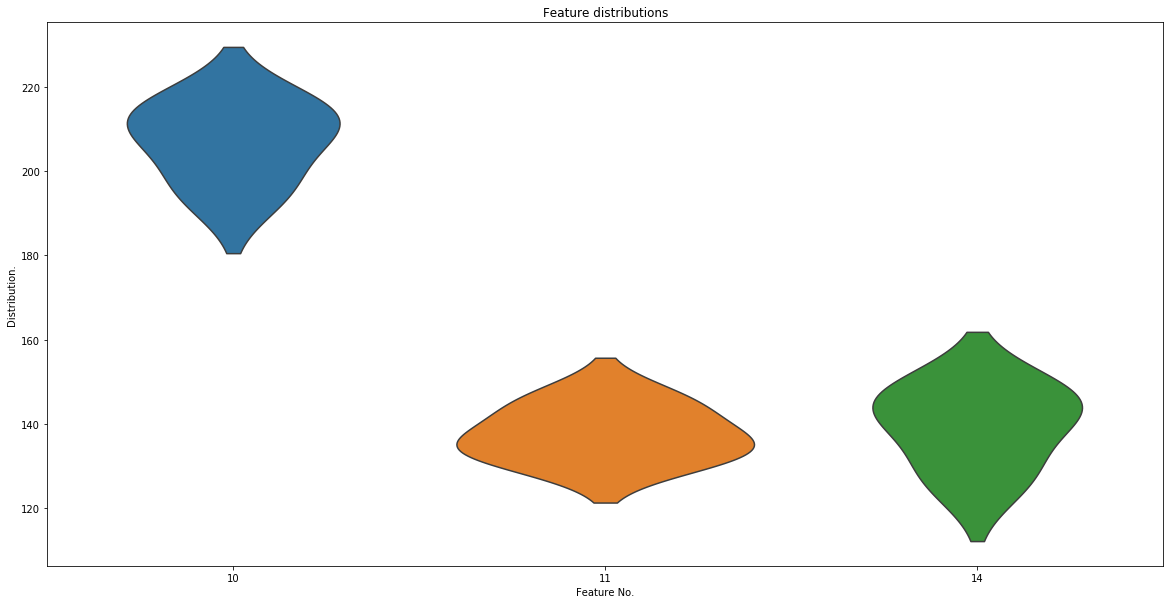

In [3]:
# Data in the form of a dictionary
dictionary = {'Ag': {'E': 1.44, 'ads_index': [30, 31, 32, 33]},
              'Au': {'E': 1.16, 'ads_index': [30, 31, 32, 33]},
              'Cu': {'E': 1.11, 'ads_index': [30, 31, 32, 33]}}

# We first create a list of atoms objects from a simple dataset.
structures = []
targets = []
for i, f in enumerate(dictionary):
    # Loading the atoms objects from traj files.
    atoms = ase.io.read(f + '.traj')
    # Attach indices of adsorbate atoms to the info dict in the key 'add_atoms'
    atoms.info['ads_atoms'] = dictionary[f]['ads_index']
    atoms.info['dbid'] = i
    # Get other information about the surface/adsorbate nearest neighbors.
    # Append atoms objects to a list.
    structures.append(atoms)
    targets.append(dictionary[f]['E'])

structure = autogen_info(structures)

# Get the fingerprint generator.
fingerprint_generator = FeatureGenerator()

# List of functions to call.
feature_functions = [fingerprint_generator.primary_surfatom,
                     fingerprint_generator.primary_adds_nn]
# There are many more available.

# Generate the data
training_data = fingerprint_generator.return_vec(structures, feature_functions)

# Get a list of names of the features.
feature_names = fingerprint_generator.return_names(feature_functions)

for l in range(len(feature_names)):
    print(l, feature_names[l])

# Select some features to plot.
selection = [10, 11, 14]

# Plot selected of the feature distributions.
data = {}
traint = np.transpose(training_data[:, selection])
for i, j in zip(traint, selection):
    data[j] = i
df = pd.DataFrame(data)
fig = plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=df, inner=None)
plt.title('Feature distributions')
plt.xlabel('Feature No.')
plt.ylabel('Distribution.')

string = 'Plotting:'
for s in selection:
    string += '\n' + feature_names[s]
print(string)